In [205]:
#Tomás Isaza Roldán
#CC 1036951049
#Primer punto

from scipy import integrate                                           #Librerias a usar
import numpy as np
import matplotlib as plt
%pylab inline

def dU_dt(U, t,m=0.2,k=1,b=0.3):                                      #Definimos la función por el metodo de Euler y los parámetros a usar      
    return [      U[1], 
            -b/m*U[1] - k/m*U[0] ]

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [206]:
l = 10 #m                                                             #Definimos la longitud del muelle, el tiempo máximo y la velocidad máxima del sistema 
tmax = 120 #s
v_max = 50 #m/s

In [207]:
N = 100                                                               #Elongación inicial del resorte y su velocidad como valores aleatorios dentro de los limites permitidos

xini = np.random.uniform(-l,l,N)
vini = np.random.uniform(0,v_max,N)

In [208]:
U0=[xini[0],vini[0]]                                                
U0

[-5.697717569790184, 10.833665254176616]

In [209]:
t=np.linspace(0,tmax,4000)                                            #Se soluciona la ecuación diferencial usando el método integrate.odeint
Us=integrate.odeint(dU_dt,U0,t)                      

Text(0, 0.5, 'Elongación [m]')

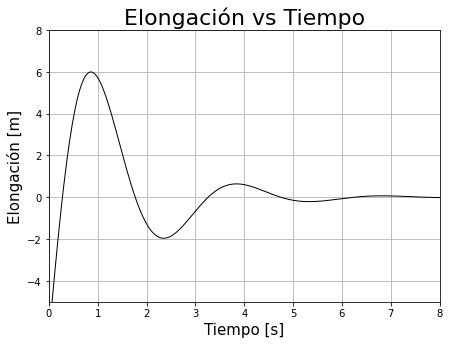

In [258]:
plt.figure(figsize=(7,5))
plt.grid()
plt.plot(t,Us[:,0],lw = 1, color = "black" )                          #Graficamos la solución de la elongación del resorte vs tiempo
plt.xlim(0,8)
plt.ylim(-5,8)
plt.title( "Elongación vs Tiempo",fontsize = 22 )
plt.xlabel(r'Tiempo [s]',size=15)
plt.ylabel(r'Elongación [m]',size=15)

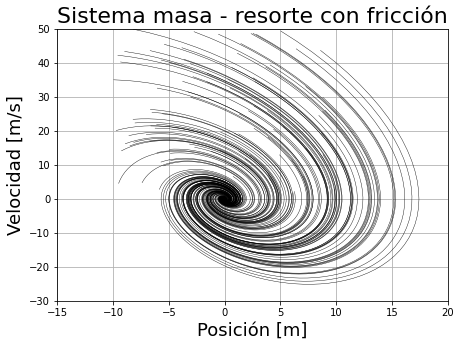

In [252]:
list( zip([1,2],[3,4]) )                                             #Usamos el método iterativo propuesto en clase para graficar 
plt.figure( figsize = (7,5) )                                        #el espacio de fase variando la condición inicial de manera aleatoria
for xin, vin in zip(xini, vini):
    t=np.linspace(0,tmax,4000)
    U0=[xin,vin]
    Us=integrate.odeint(dU_dt,U0,t)
    plt.plot(Us[:,0],Us[:,1],lw = 0.4, color = "black" )
    
plt.xlabel( "Posición [m]", fontsize = 18 )                          #Vemos que el resultado tiene sentido para un resorte amortiguado con
plt.ylabel( "Velocidad [m/s]", fontsize = 18 )                       #coeficiente de amortiguación de 0.3, vemos como varia la condición inicial 
plt.xlim( (-15, 20) )                                                #y como evoluciona el estado dentro del espacio de configuración del sistema
plt.ylim( (-30, v_max) )
plt.title( "Sistema masa - resorte con fricción",fontsize = 22 )
plt.grid()    

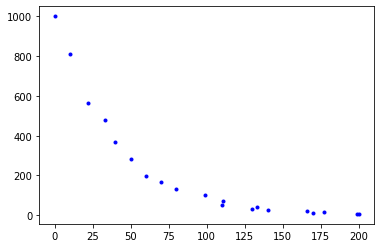

In [239]:
#Tomás Isaza Roldán
#CC 1036951049
#Segundo punto 

from urllib.request import urlopen                      #Importamos librerias para leer el archivo 
import json
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json'
resp = urlopen(url)
data_json = json.loads(resp.read())                     #Cargamos el archivo

df=pd.DataFrame(data_json)                              #Creamos el DataFrame 
df2=df["t"]                                             #Definimos las colunmas a usar por separado
df3=df["N(t)"]
plt.plot(df2,df3, 'b.')                                 #Graficamos las columnas df2 y df3

Tiempo de vida media = 27.991641498383633
Valor del parámetro lambda = 0.02476264854277913
Error asociado al parámetro lambda = 1.3083896135537534e-07 




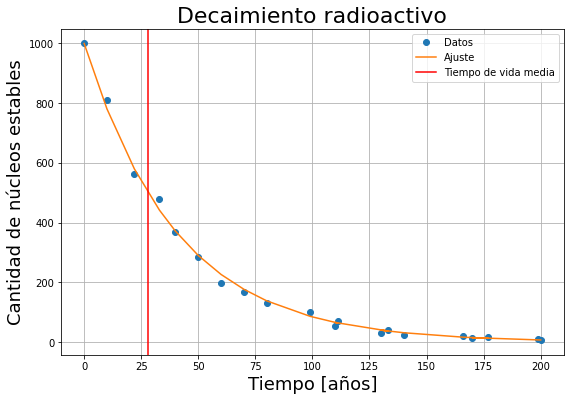

In [253]:
from scipy.optimize import curve_fit                    #Importamos curve_fit de la libreria scipy
import warnings
warnings.filterwarnings('ignore')                       #Ignoramos el texto por defecto del método

def Gauss(x, B):
    y = 1000*np.exp(-B*x)                               #Definimos la función exponencial con un valor de N=1000 por defecto
    return y
parameters, covariance = curve_fit(Gauss, df2, df3)     #Calculamos los parámetros de la función usando curve_fit

fit_B = parameters[0]                                   #Definimos el parámetro lambda y la función exponencial del ajuste
fit_y = Gauss(df2, fit_B)

plt.figure(figsize=(9,6))                               #Graficamos
plt.plot(df2, df3, 'o', label='Datos')
plt.plot(df2, fit_y, '-', label='Ajuste')
plt.xlabel( "Tiempo [años]", fontsize = 18 )
plt.ylabel( "Cantidad de núcleos estables", fontsize = 18 )
plt.title( "Decaimiento radioactivo",fontsize = 22 )
plt.axvline(x=np.log(2)/fit_B, color='r', label='Tiempo de vida media')
plt.legend()
plt.grid()

print(f'Tiempo de vida media =', np.log(2)/fit_B)                                            #Se imprimen los valores del tiempo de vida medio, el parámetro lambda 
print(f'Valor del parámetro lambda =',fit_B,)                                                #y su error asociado dado como un valor del método curve_fit
print(f'Error asociado al parámetro lambda =',float(curve_fit(Gauss,df2,df3)[1]),'\n\n')

